# Brownian motion model in parallel
This notebook simulates the Brownian motion of multiple agents in a 2D space using parallel processing. The Agent class represents an agent that moves randomly in the x and y directions. The experiment function simulates the movement of a specified number of agents over a given number of moves. The multiprocessing.Pool is used to run multiple experiments in parallel

There is also a version where ecach process writes its results to a shared file, A Manager function from the multiprocessing module is used to handle the shared file.  
.  
See full code explanation below

In [ ]:
from random import randint
import matplotlib.pyplot as plt
from multiprocessing import Pool, Manager,cpu_count
from filelock import FileLock

In [ ]:
# Define the Agent class to represent an agent in a 2D space
class Agent:
    def __init__(self, x=0, y=0):
        # Initialize the agent's position
        self.x = x
        self.y = y

    def move(self):
        # Move the agent by adding a random integer between -1 and 1 to both x and y
        self.x += randint(-1, 1)
        self.y += randint(-1, 1)

    def __str__(self):
        # Return a string representation of the agent's position
        return f"Agent at position ({self.x}, {self.y})"


In [ ]:
# Define the experiment function to simulate the movement of agents
def experiment(task):
    # Unpack the task tuple
    task_id, num_agents, num_moves = task
    # Create a list of agents
    agents = [Agent() for _ in range(num_agents)]
    # Simulate the movement of agents
    for _ in range(num_moves):
        for a in agents:
            a.move()
    # Print a message indicating that the task is done
    print(f'Task {task_id} done')
    # Return the final positions of all agents
    return [(a.x, a.y) for a in agents]

Using 2 cores
Starting ....
Task 0 done
Task 1 done
Task 2 done
Task 3 done
Task 4 done
Task 5 done
Task 6 done
Task 7 done
Done


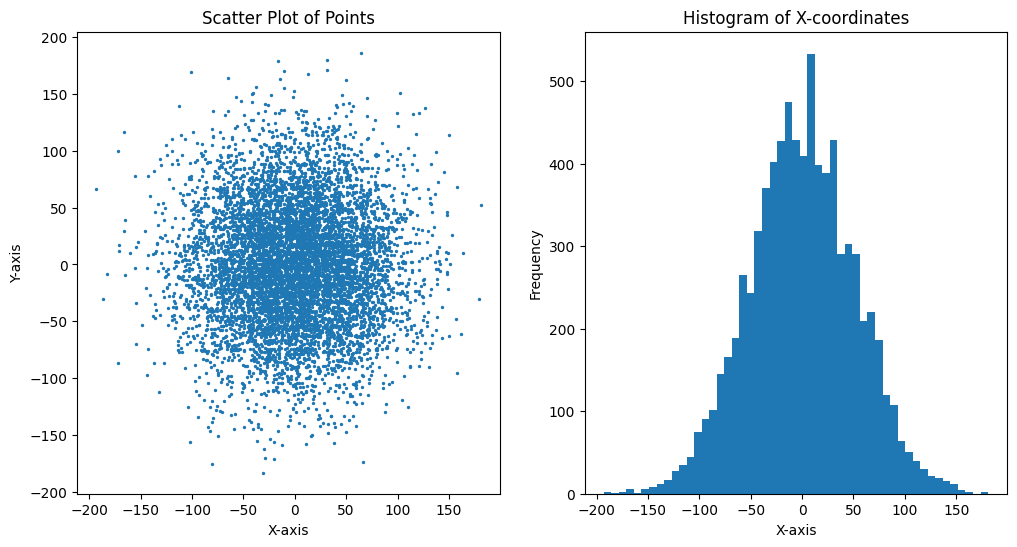

In [ ]:
# Define the number of tasks
num_tasks = 8
# Create a list of tasks, each task is a tuple containing task_id, num_agents, and num_moves
num_agents = 1000
iterations = 4000
tasks = [
    (id, num_agents, iterations)  # Note passed as tuples Important
    for id in range(num_tasks)
]

# print out the number of avalable cores
print(f"Using {cpu_count()} cores")

# Use Pool to manage parallel execution
with Pool() as pool:
    # Map the experiment function to the list of tasks and collect the results
    print("Starting ....")
    results = pool.map(experiment, tasks)
    print("Done")

    # Initialize an empty list to store all points
    points = []
    # Extend the points list with the results from each task
    for result in results:
        points.extend(result)



# Unpack the points into x_coords and y_coords
x_coords, y_coords = zip(*points)

# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot
axs[0].scatter(x_coords, y_coords, s=2 )
axs[0].set_xlabel('X-axis')
axs[0].set_ylabel('Y-axis')
axs[0].set_title('Scatter Plot of Points')

# Histogram
axs[1].hist(x_coords, bins=51)
axs[1].set_xlabel('X-axis')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Histogram of X-coordinates')

plt.show()




### Task Definition and Parallel Execution

#### Task Definition
```python
num_tasks = 8
num_agents = 1000
iterations = 4000
tasks = [
    (id, num_agents, iterations)  # Note passed as tuples Important
    for id in range(num_tasks)
]
```
- `num_tasks` is set to 8, indicating that there will be 8 parallel tasks.
- `tasks` is a list of tuples. Each tuple contains three elements:
  - `task_id`: A unique identifier for the task (ranging from 0 to 7).
  - `num_agents`: The number of agents to simulate in this task (1000).
  - `num_moves`: The number of moves each agent will make (4000).

The list comprehension generates 8 tuples, each representing a different task.

#### Parallel Execution with `Pool`

```python
with Pool() as pool:
    results = pool.map(experiment, tasks)
    points = []
    for result in results:
        points.extend(result)

x_coords, y_coords = zip(*points)
```
- `Pool()` creates a pool of worker processes. The `with` statement ensures that the pool is properly managed and cleaned up after use.
- `pool.map(experiment, tasks)` applies the `experiment` function to each task in the `tasks` list in parallel. Here's how it works:
  - The `experiment` function is defined to take a single task tuple as an argument.
  - `pool.map` distributes these tasks across multiple worker processes.
  - Each worker process runs the `experiment` function on its assigned task.
  - The results from each task are collected and returned as a list.

#### Detailed Explanation of `pool.map`

1. **Task Distribution**:
   - The `pool.map` function distributes the tasks across the available worker processes. If you have 8 tasks and 8 worker processes, each process will handle one task.
   - If you have more tasks than worker processes, the tasks will be distributed in a round-robin fashion.

2. **Parallel Execution**:
   - Each worker process runs the `experiment` function independently. This means that the simulation of agent movements for each task is performed concurrently.
   - The `experiment` function simulates the movement of 1000 agents for 4000 moves, which is a computationally intensive task. By running these simulations in parallel, the overall execution time is significantly reduced compared to running them sequentially.

3. **Result Collection**:
   - The results from each task are collected into the `results` list. Each element in `results` is a list of tuples representing the final positions of the agents in that task.
   - The `points` list is then populated by extending it with the results from each task.

#### Extracting Coordinates

```python
x_coords, y_coords = zip(*points)
```
- `zip(*points)` unpacks the `points` list and groups the x-coordinates and y-coordinates separately.
- `x_coords` will contain all the x-coordinates of the final positions.
- `y_coords` will contain all the y-coordinates of the final positions.

### How Python Handles Parallelism

Python's `multiprocessing` module allows you to create processes that run in parallel. Here's a brief overview of how it works:

1. **Process Creation**:
   - When you create a `Pool`, it spawns a number of worker processes. By default, the number of worker processes is equal to the number of CPU cores on your machine.

2. **Inter-Process Communication (IPC)**:
   - The `Pool` manages communication between the main process and the worker processes. When you call `pool.map`, the tasks are sent to the worker processes, and the results are collected back in the main process.

3. **Data Sharing**:
   - Each worker process has its own memory space, so data is not shared directly between processes.

4. **Synchronization**:
   - The `Pool` handles synchronization between the main process and the worker processes. It ensures that tasks are distributed and results are collected in a controlled manner.



## An example that writes  results to file

To modify the code to use a generator for the task list and write each result to a shared file as it is completed, you can follow these steps:

Use a generator to yield tasks.  
Write results to a shared file within the experiment function.  
Use a Manager from the multiprocessing module to handle the shared file.  
Here's the modified code:  


Using 2 cores
Starting ...
Writing task 1 data
Task 1 done
Writing task 0 data
Task 0 done
Writing task 2 data
Task 2 done
Writing task 3 data
Task 3 done
Writing task 4 data
Task 4 done
Writing task 5 data
Task 5 done
Writing task 6 data
Task 6 done
Writing task 7 data
Task 7 done
Done


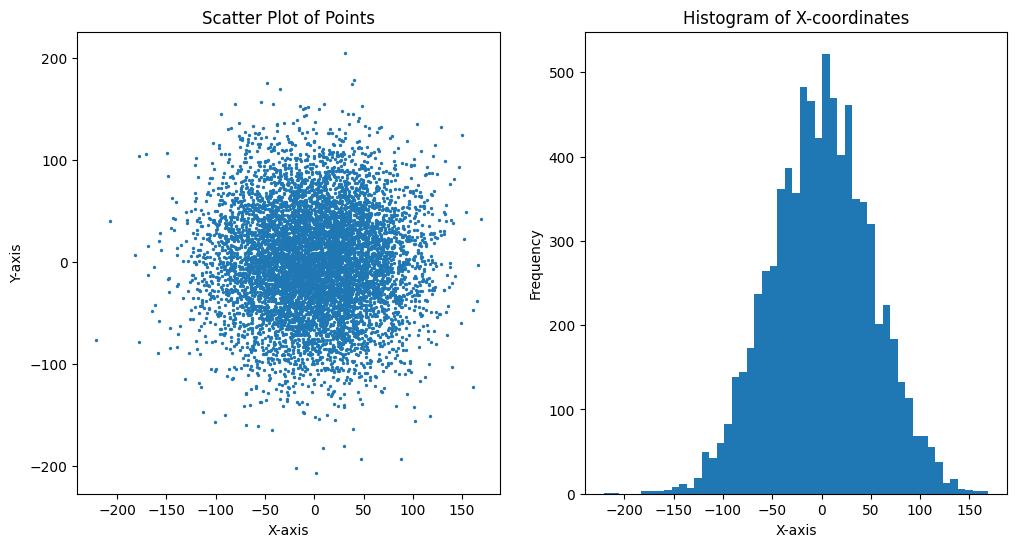

In [ ]:
# Define the experiment function
def experiment(task):
    task_id, num_agents, num_moves, shared_file = task
    # Unpack the task tuple
    task_id, num_agents, num_moves = task_id, num_agents, num_moves

    # Create a list of agents
    agents = [Agent() for _ in range(num_agents)]

    # Simulate the movement of agents
    for _ in range(num_moves):
        for a in agents:
            a.move()



    # Collect the results (positions of agents)
    result = [(a.x, a.y) for a in agents]

    # Create a file lock to ensure thread-safe file writing
    lock = FileLock(shared_file + '.lock')
    print(f'Writing task {task_id} data')
    # Acquire the lock and write the results to the shared file
    with lock:
        with open(shared_file, 'a') as f:
            for point in result:
                f.write(f"{point[0]} {point[1]}\n")

    # Print a message indicating the task is done
    print(f'Task {task_id} done')
    # Return the result for further processing
    #return result

# Define a generator for tasks
def task_generator(num_tasks, shared_file):
    for i in range(num_tasks):
        yield (i, 1000, 4000, shared_file)

# Define the number of tasks and the shared file name
num_tasks = 8
shared_file = 'results.txt'

# Ensure the shared file is empty before starting
open(shared_file, 'w').close()

# Print out the number of available cores
print(f"Using {cpu_count()} cores")

# Use Pool to manage parallel execution
with Pool() as pool:
    # Use imap to process tasks as they are generated
    print("Starting ...")
    results = pool.imap(experiment, task_generator(num_tasks, shared_file))


    # Process each result as it comes in
    for result in results:
        pass  # You can process each result here if needed
print("Done")
# Ensure all processes have completed before reading the file
pool.close()
pool.join()

# Initialize an empty list to store all points
points = []

# Read the results from the shared file
with open(shared_file, 'r') as f:
    for line in f:
        x, y = map(int, line.split())
        points.append((x, y))

# Unzip the points into separate lists for x and y coordinates
x_coords, y_coords = zip(*points)

# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot
axs[0].scatter(x_coords, y_coords, s=2)
axs[0].set_xlabel('X-axis')
axs[0].set_ylabel('Y-axis')
axs[0].set_title('Scatter Plot of Points')

# Histogram
axs[1].hist(x_coords, bins=51)
axs[1].set_xlabel('X-axis')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Histogram of X-coordinates')

plt.show()




### Imports and Setup

```python
from multiprocessing import Pool
from filelock import FileLock
import matplotlib.pyplot as plt
```


- **filelock.FileLock**: This library is used to create a file lock to ensure that file operations are thread-safe.


### Experiment Function

```python
def experiment(task, shared_file):
    task_id, num_agents, num_moves = task
    agents = [Agent() for _ in range(num_agents)]
    for _ in range(num_moves):
        for a in agents:
            a.move()
    print(f'{task_id} done')
    result = [(a.x, a.y) for a in agents]

    lock = FileLock(shared_file + '.lock')
    with lock:
        with open(shared_file, 'a') as f:
            for point in result:
                f.write(f"{point[0]} {point[1]}\n")

    return result
```

- **task**: A tuple containing `task_id`, `num_agents`, and `num_moves`.
- **shared_file**: The name of the file where results will be written.
- **Unpacking Task**: The task tuple is unpacked into `task_id`, `num_agents`, and `num_moves`.
- **Agent Creation**: A list of `Agent` objects is created. Each `Agent` object represents an agent in the simulation.
- **Agent Movement**: Each agent moves a specified number of times (`num_moves`). The `move` method of the `Agent` class is called for each agent.
- **Result Collection**: The positions of the agents are collected into a list of tuples `(x, y)`.
- **File Locking**: A file lock is created to ensure thread-safe writing to the shared file.
- **Writing Results**: The results are written to the shared file in a thread-safe manner.
- **Returning Results**: The results are returned for further processing.

### Task Generator

```python
def task_generator(num_tasks):
    for i in range(num_tasks):
        yield (i, 1000, 4000)
```

- **num_tasks**: The number of tasks to generate.
- **Yielding Tasks**: The generator yields tasks as tuples containing `task_id`, `num_agents`, and `num_moves`. In this case, `num_agents` is 1000 and `num_moves` is 4000 for each task.

### Main Execution

```python
num_tasks = 8
shared_file = 'results.txt'

# Ensure the shared file is empty before starting
open(shared_file, 'w').close()

with Pool() as pool:
    results = pool.imap(experiment, task_generator(num_tasks, shared_file))

# Ensure all processes have completed before reading the file
pool.close()
pool.join()

points = []
with open(shared_file, 'r') as f:
    for line in f:
        x, y = map(int, line.split())
        points.append((x, y))

x_coords, y_coords = zip(*points)

plt.scatter(x_coords, y_coords, s=2)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot of Points')
plt.show()
```
- **Generator Function**: The task_generator function is defined to yield tasks one at a time. This way, the tasks are generated on-the-fly as needed, rather than all at once.
- **num_tasks**: The number of tasks to be processed. In this case, it is set to 8.
- **shared_file**: The name of the file where results will be written.
- **Ensure Shared File is Empty**: The shared file is ensured to be empty before starting by opening it in write mode and immediately closing it.
- **Pool Management**: A `Pool` is created to manage parallel execution of tasks.
- **Mapping Tasks**: The `experiment` function is mapped to the list of tasks using `pool.starmap`. This allows each task to be processed in parallel.
- **Ensuring Completion**: The pool is closed and joined to ensure all processes have completed.
- **Reading Results**: The results are read from the shared file and stored in a list of tuples `(x, y)`.
